# Problem statement 1:Forecast the CocaCola prices. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
import matplotlib.pyplot as plt

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

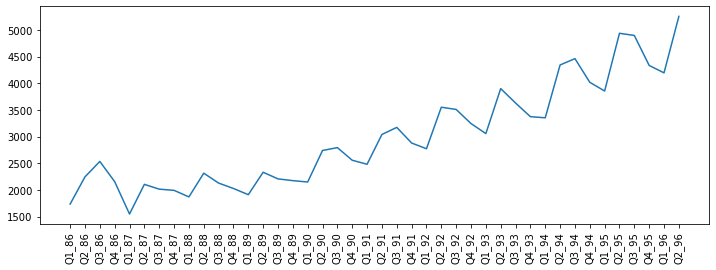

In [4]:
#Line plot of the cocacola data
plt.figure(figsize=(12,4))
plt.plot('Quarter','Sales',data= cocacola)
plt.xticks(rotation=90)

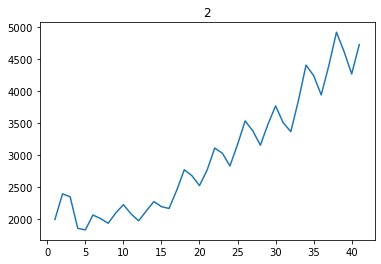

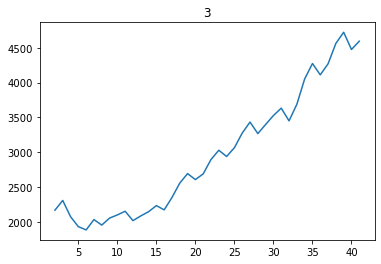

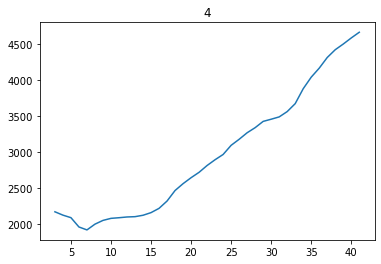

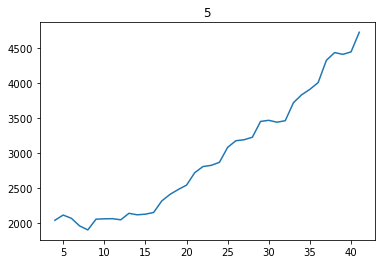

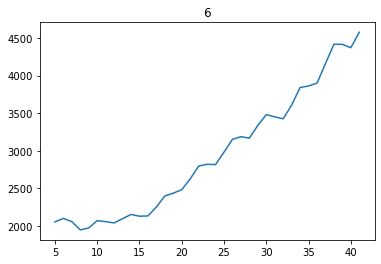

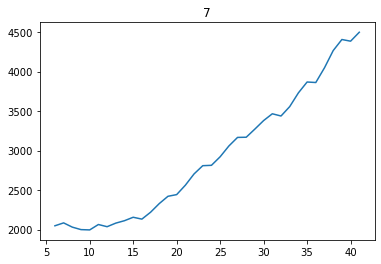

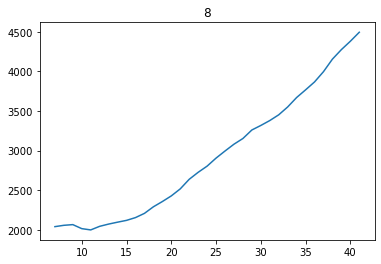

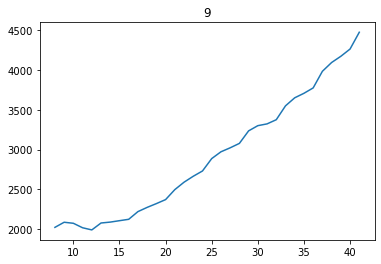

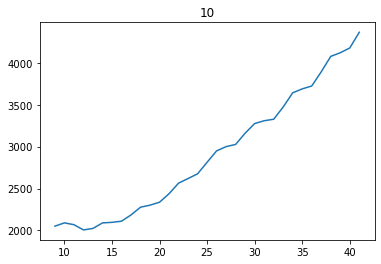

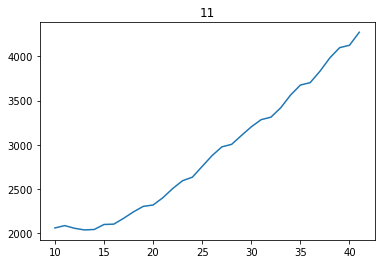

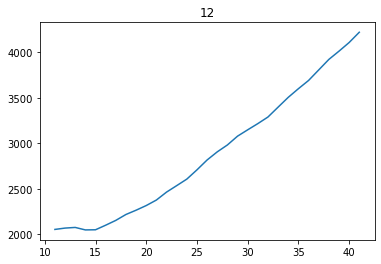

In [5]:
#Checking different window sizes for the cocacola data so as to find the best window size for moving average
for i in range(2,13):
    cocacola.Sales.rolling(i).mean().plot()
    plt.title(i)
    plt.show()

In [6]:
#from the above graphs it was clear that period of 4 is the most suited window size where graph is getting more smooth so window size =4
#Also this can be also verified as this smoothening is occuring at window size of 8 also and its getting bad after 4 and 8 

In [7]:
#Time series decomposition plot with season and trend and noise

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

<function matplotlib.pyplot.show(close=None, block=None)>

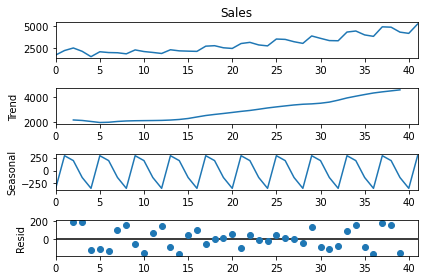

In [9]:
seasonal_decompose(cocacola.Sales,period=4).plot()
plt.show

In [10]:
#correlation plots
import statsmodels.graphics.tsaplots as tsa_plots

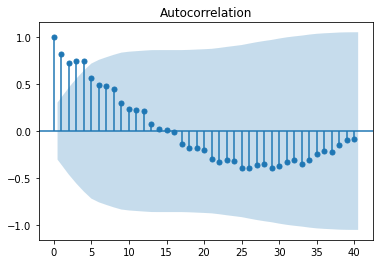

In [11]:
tsa_plots.plot_acf(cocacola.Sales,lags=40)
plt.show()

In [12]:
#Here we are getting correlation as first positive and then becoming negative and then again becoming positive.
#This is happening as sales is increasing and decreasing in a particular period as it has some seasonality
#So model with the seasonality maybe well suited model for this type of data for forecasting i.e. triple exponential model
#Still we will try with the different models and will choose the best having minimum rmse

In [13]:
#Splitting the data

In [14]:
coctrain= cocacola.head(33)
coctest= cocacola.tail(9)

In [15]:
#defining rsme
def rsme(pred,org):
    sales = (((pred-org)**2).mean())**0.5
    return sales

In [16]:
import numpy as np
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [17]:
#model 1: simple exponetial model

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=0.4)
pred_ses= ses_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [19]:
rsme(pred_ses,coctest.Sales)

1140.4071759618917

In [20]:
MAPE(pred_ses,coctest.Sales)

22.836610546330164

In [21]:
#Calculating the best value of smoothing level which gives minimum MAPE error

In [22]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
for i in x:
    ses_model1 = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=i)
    pred_ses1= ses_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
    score= MAPE(pred_ses1,coctest.Sales)
    print("for smoothing level",i,"MAPE is",score)

for smoothing level 0.2 MAPE is 24.997442942253908
for smoothing level 0.3 MAPE is 23.200635065156714
for smoothing level 0.4 MAPE is 22.836610546330164
for smoothing level 0.41 MAPE is 22.836676248751036
for smoothing level 0.42 MAPE is 22.84112855143161
for smoothing level 0.43 MAPE is 22.84957092569943
for smoothing level 0.44 MAPE is 22.861641829657692
for smoothing level 0.5 MAPE is 22.993536067252723
for smoothing level 0.55 MAPE is 23.15581663094295
for smoothing level 0.6 MAPE is 23.34277224538063
for smoothing level 0.7 MAPE is 23.73187288813724
for smoothing level 0.78 MAPE is 24.010975409600753
for smoothing level 0.8 MAPE is 24.072024662767475
for smoothing level 0.9 MAPE is 24.308309940897125


In [23]:
#so smoothing value nearby 0.4 gives the minimum MAPE error

In [24]:
#Calculating the best value of smoothing level which gives minimum rsme error

In [25]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
for i in x:
    ses_model2 = SimpleExpSmoothing(coctrain.Sales).fit(smoothing_level=i)
    pred_ses2= ses_model2.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
    score2= rsme(pred_ses2,coctest.Sales)
    print("for smoothing level",i,"rsme is",score2)

for smoothing level 0.2 rsme is 1229.5210982553044
for smoothing level 0.3 rsme is 1155.344441317345
for smoothing level 0.4 rsme is 1140.4071759618917
for smoothing level 0.41 rsme is 1140.4098690061708
for smoothing level 0.42 rsme is 1140.5923647840898
for smoothing level 0.43 rsme is 1140.9384235928562
for smoothing level 0.44 rsme is 1141.4332494497512
for smoothing level 0.5 rsme is 1146.8423966938044
for smoothing level 0.55 rsme is 1153.5036206921948
for smoothing level 0.6 rsme is 1161.185621925109
for smoothing level 0.7 rsme is 1177.2002657978023
for smoothing level 0.78 rsme is 1188.7089990742957
for smoothing level 0.8 rsme is 1191.2286751514882
for smoothing level 0.9 rsme is 1200.9885434567843


In [26]:
#so smoothing value nearby 0.4 gives the minimum rsme error, hence finalizing smoothing value as 0.4

In [27]:
#2. Holt double exponential smoothing method

In [28]:
from statsmodels.tsa.holtwinters import Holt
des_model = Holt(coctrain.Sales).fit(smoothing_level=0.4,smoothing_trend=0.2)
pred_des= des_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [29]:
rsme(pred_des,coctest.Sales)

849.0285897087156

In [30]:
MAPE(pred_des,coctest.Sales)

16.023981732110357

In [31]:
#Calculating the value of smoothing trend which gives minimum MAPE error

In [32]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model1 = Holt(coctrain.Sales).fit(smoothing_level=i,smoothing_trend=j)
        pred_des1= des_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
        dscore= MAPE(pred_des1,coctest.Sales)
        print("for smoothing levl",i,"smoothing trend",j,"MAPE is",dscore)

for smoothing levl 0.2 smoothing trend 0.05 MAPE is 13.622412789401558
for smoothing levl 0.2 smoothing trend 0.07 MAPE is 12.792658055721953
for smoothing levl 0.2 smoothing trend 0.1 MAPE is 11.445802099260627
for smoothing levl 0.2 smoothing trend 0.12 MAPE is 10.776643226898551
for smoothing levl 0.2 smoothing trend 0.13 MAPE is 10.589134967873257
for smoothing levl 0.2 smoothing trend 0.15 MAPE is 10.312961527121054
for smoothing levl 0.2 smoothing trend 0.16 MAPE is 10.215810022743774
for smoothing levl 0.2 smoothing trend 0.17 MAPE is 10.146116467474595
for smoothing levl 0.2 smoothing trend 0.18 MAPE is 10.103123857322403
for smoothing levl 0.2 smoothing trend 0.19 MAPE is 10.085453768527143
for smoothing levl 0.2 smoothing trend 0.2 MAPE is 10.091344368217188
for smoothing levl 0.2 smoothing trend 0.21 MAPE is 10.118807056820293
for smoothing levl 0.3 smoothing trend 0.05 MAPE is 14.10279951081092
for smoothing levl 0.3 smoothing trend 0.07 MAPE is 13.44494353885784
for smooth

for smoothing levl 0.7 smoothing trend 0.18 MAPE is 20.965872983964296
for smoothing levl 0.7 smoothing trend 0.19 MAPE is 21.326541846480893
for smoothing levl 0.7 smoothing trend 0.2 MAPE is 21.69192222655312
for smoothing levl 0.7 smoothing trend 0.21 MAPE is 22.060345861434758
for smoothing levl 0.78 smoothing trend 0.05 MAPE is 18.50456848620337
for smoothing levl 0.78 smoothing trend 0.07 MAPE is 18.72172822367654
for smoothing levl 0.78 smoothing trend 0.1 MAPE is 19.30180389421511
for smoothing levl 0.78 smoothing trend 0.12 MAPE is 19.839410137431095
for smoothing levl 0.78 smoothing trend 0.13 MAPE is 20.143683079779684
for smoothing levl 0.78 smoothing trend 0.15 MAPE is 20.805465881307164
for smoothing levl 0.78 smoothing trend 0.16 MAPE is 21.156488885886816
for smoothing levl 0.78 smoothing trend 0.17 MAPE is 21.517149865479706
for smoothing levl 0.78 smoothing trend 0.18 MAPE is 21.88505202630958
for smoothing levl 0.78 smoothing trend 0.19 MAPE is 22.258125940325304
for

In [33]:
#so smoothing level 0.2 and smoothing trend nearby 0.19 gives the minimum MAPE error

In [34]:
#Calculating the value of smoothing trend which gives minimum rsme error

In [35]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model2 = Holt(coctrain.Sales).fit(smoothing_level=i,smoothing_trend=j)
        pred_des2= des_model2.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])
        dscore2= rsme(pred_des2,coctest.Sales)
        print("for smoothing levl",i,"smoothing trend",j,"rsme is",dscore2)

for smoothing levl 0.2 smoothing trend 0.05 rsme is 750.2404777952084
for smoothing levl 0.2 smoothing trend 0.07 rsme is 718.1614138649718
for smoothing levl 0.2 smoothing trend 0.1 rsme is 664.2779679080255
for smoothing levl 0.2 smoothing trend 0.12 rsme is 632.776642170917
for smoothing levl 0.2 smoothing trend 0.13 rsme is 619.8101571380436
for smoothing levl 0.2 smoothing trend 0.15 rsme is 600.4270278400487
for smoothing levl 0.2 smoothing trend 0.16 rsme is 594.0776057744462
for smoothing levl 0.2 smoothing trend 0.17 rsme is 589.8814030842819
for smoothing levl 0.2 smoothing trend 0.18 rsme is 587.7401334847804
for smoothing levl 0.2 smoothing trend 0.19 rsme is 587.5296351491753
for smoothing levl 0.2 smoothing trend 0.2 rsme is 589.1149890638743
for smoothing levl 0.2 smoothing trend 0.21 rsme is 592.357393237314
for smoothing levl 0.3 smoothing trend 0.05 rsme is 769.203278847297
for smoothing levl 0.3 smoothing trend 0.07 rsme is 743.4548998073705
for smoothing levl 0.3 sm

for smoothing levl 0.7 smoothing trend 0.19 rsme is 1070.2780086109851
for smoothing levl 0.7 smoothing trend 0.2 rsme is 1086.6976835827122
for smoothing levl 0.7 smoothing trend 0.21 rsme is 1103.3180650028924
for smoothing levl 0.78 smoothing trend 0.05 rsme is 944.4072410521052
for smoothing levl 0.78 smoothing trend 0.07 rsme is 953.7797915579638
for smoothing levl 0.78 smoothing trend 0.1 rsme is 978.9196992640874
for smoothing levl 0.78 smoothing trend 0.12 rsme is 1002.4040386348026
for smoothing levl 0.78 smoothing trend 0.13 rsme is 1015.774422106322
for smoothing levl 0.78 smoothing trend 0.15 rsme is 1045.041829771705
for smoothing levl 0.78 smoothing trend 0.16 rsme is 1060.6649292574825
for smoothing levl 0.78 smoothing trend 0.17 rsme is 1076.784706411697
for smoothing levl 0.78 smoothing trend 0.18 rsme is 1093.2958239234026
for smoothing levl 0.78 smoothing trend 0.19 rsme is 1110.1058141630747
for smoothing levl 0.78 smoothing trend 0.2 rsme is 1127.135777616427
for s

In [36]:
#so smoothing level 0.2 and smoothing trend nearby 0.19 gives the minimum rsme error. Also compared with the single exponential model this model gives less error(both rsme and MAPE)

In [37]:
#3.1 Holts winter exponential smoothing with additive seasonality and additive trend

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes_model= ExponentialSmoothing(endog=coctrain.Sales,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.2,smoothing_trend=0.19)
pred_tes=tes_model.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [39]:
MAPE(pred_tes,coctest.Sales)

10.455020287757558

In [40]:
rsme(pred_tes,coctest.Sales)

502.5106649420153

In [41]:
#3.2 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
tes_model1= ExponentialSmoothing(endog=coctrain.Sales,trend='add',seasonal='mul',seasonal_periods=4).fit(smoothing_level=0.2,smoothing_trend=0.19)
pred_tes1=tes_model1.predict(start=coctest.Quarter.index[0],end=coctest.Quarter.index[8])

In [43]:
MAPE(pred_tes1,coctest.Sales)

9.680795335357598

In [44]:
rsme(pred_tes1,coctest.Sales)

456.1257661215223

In [45]:
#So Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error values for both(rsme and MAPE)

In [46]:
# So we can say that this is best model compared with simple and double exponential model

In [47]:
#So forecasting the data with this
tes_model1.forecast(10)

33    4155.026151
34    3928.579138
35    3657.692783
36    3517.829311
37    4456.222182
38    4208.291074
39    3913.563362
40    3759.686148
41    4757.418212
42    4488.003010
dtype: float64

In [48]:
#Check with the arima model 

In [49]:
#4.Arima model

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model= ARIMA(coctrain.Sales,order=(3,2,2))

In [52]:
model_fit= model.fit()

In [53]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   31
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -203.881
Method:                       css-mle   S.D. of innovations            150.822
Date:                Mon, 04 Apr 2022   AIC                            421.762
Time:                        20:23:36   BIC                            431.800
Sample:                             2   HQIC                           425.034
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9988      3.388      1.180      0.238      -2.641      10.639
ar.L1.D2.Sales    -1.0651      0.071    -14.897      0.000      -1.205      -0.925
ar.L2.D2.Sales    -1.0391      0.076    -13.699      0.000      -1.188      -0.890
ar.L3.D2.Sales    -0.9489      0.040    -23.511      0.000      -1.028      -0.870
ma.L1.D2.Sales    -0.1568      0.200     -0.783      0.433      -0.549       0.235
ma.L2.D2.Sales    -0.4010      0.192     -2.087      0.037      -0.777      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0135           -0.0000j            1.0135           -0.5000
AR.2           -0.0408           -1.0189j            1.0197           -0.2564
AR.3           -0.0408           +1.0189j            1.0197            0.2564
MA.1            1.3958           +0.0000j            1.3958            0.0000
MA.2           -1.7867           +0.0000j            1.7867            0.5000
-----------------------------------------------------------------------------
"""

In [54]:
yhat= model_fit.forecast()[0]

In [55]:
rsme(yhat,coctest.Sales)

532.4954533395581

In [56]:
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values 
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
 adf_test(coctrain['Sales'])

1. ADF :  -0.0015260864775444292
2. P-Value :  0.958405697667258
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 28
5. Critical Values :
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


In [57]:
#As p value is high we can say that data is not stationary

In [58]:
#Now, let’s take the log difference in an effort to make it stationary
cocacola['Sales'] = np.log(cocacola['Sales'])
cocacola['Sales'] = cocacola['Sales'].diff()
cocacola = cocacola.drop(coctrain.index[0])

In [59]:
cocacola

,Quarter,Sales
1,Q2_86,0.257780
2,Q3_86,0.121034
3,Q4_86,-0.161949
4,Q1_87,-0.330927
5,Q2_87,0.307189
6,Q3_87,-0.043733
7,Q4_87,-0.011291
8,Q1_88,-0.063582
9,Q2_88,0.213388
10,Q3_88,-0.083486


<AxesSubplot:>

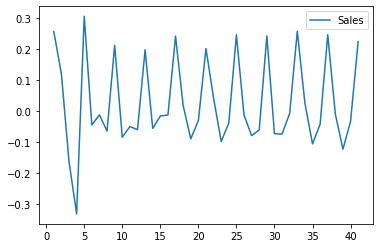

In [60]:
cocacola.plot()

In [61]:
#still our data contains the seasonality so taking period of 4 as we have quarterly data

In [62]:
# Seasonal differencing
cocacola['Sales'] = cocacola['Sales'].diff(4)
cocacola = cocacola.drop(coctrain.index[1])

In [63]:
cocacola = cocacola.drop(coctrain.index[2])

In [64]:
cocacola = cocacola.drop(coctrain.index[3])

In [65]:
cocacola = cocacola.drop(coctrain.index[4])

In [66]:
cocacola

,Quarter,Sales
5,Q2_87,0.049409
6,Q3_87,-0.164767
7,Q4_87,0.150658
8,Q1_88,0.267345
9,Q2_88,-0.093801
10,Q3_88,-0.039753
11,Q4_88,-0.037570
12,Q1_89,0.004529
13,Q2_89,-0.014440
14,Q3_89,0.028548


In [67]:
cocacola.shape

(37, 2)

In [68]:
#again splitting the data
coctrain1= cocacola.head(29)
coctest1= cocacola.tail(8)

In [69]:
#Again checking for the fuller test of stationary data
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values 
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
adf_test(coctrain1['Sales'])

1. ADF :  -5.583118118839324
2. P-Value :  1.382145775559211e-06
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 28
5. Critical Values :
	 1% :  -3.6889256286443146
	 5% :  -2.9719894897959187
	 10% :  -2.6252957653061224


In [70]:
#hence now we have got p value very less so we can consider this data as stationary

In [426]:
#finding best values of p,d and q

In [166]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [71]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [78]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, coctrain1['Sales'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 3, 1, 0)",-39.690362
1,"(2, 1, 1, 0)",-39.142816
2,"(0, 3, 0, 3)",-39.031372
3,"(0, 3, 0, 2)",-38.848397
4,"(0, 1, 1, 0)",-38.456306
...,...,...
251,"(0, 0, 3, 1)",-21.361627
252,"(1, 0, 3, 3)",-21.331099
253,"(0, 0, 2, 3)",-20.790571
254,"(0, 0, 3, 2)",-20.569210


In [82]:
result_df.AIC.min()

-39.69036153731575

In [83]:
# From the table, we can see that the best model is: SARIMA(0, 1, 3)(1, 1, 0, 4)

In [84]:
#So this is the SARIMA model for the data

In [85]:
best_model = SARIMAX(coctrain1['Sales'], order=(0, 1, 3), seasonal_order=(1, 1, 0, 4)).fit(dis=-1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   29
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 4)   Log Likelihood                  24.845
Date:                            Mon, 04 Apr 2022   AIC                            -39.690
Time:                                    20:43:51   BIC                            -33.800
Sample:                                         0   HQIC                           -38.128
                                             - 29                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3774     11.264     -0.122      0.903     -23.454      20.699
ma.L2         -0.1503      4.571   

In [86]:
# Now predicting the data

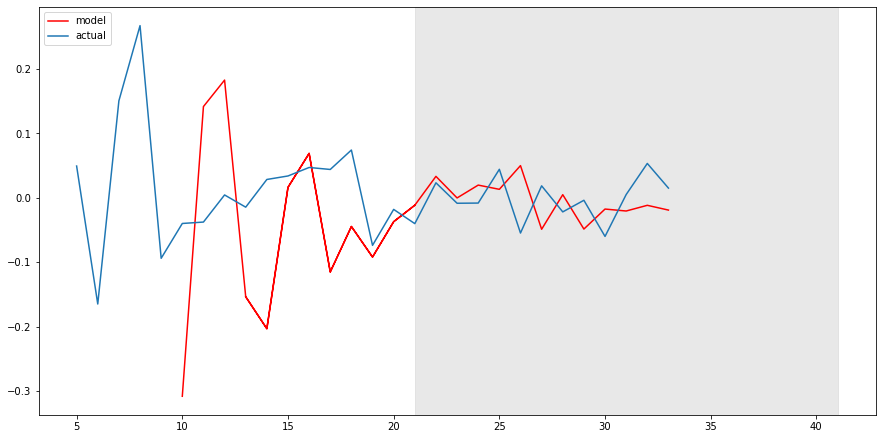

In [93]:
cocacola['arima_model'] = best_model.fittedvalues
cocacola['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=coctest1.Sales.shape[0], end=coctest1.Sales.shape[0] + 8)
forecast = cocacola['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(coctest1.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(coctrain1['Sales'], label='actual')
plt.legend()
plt.show()

In [94]:
#Hence this is model with minimum error if SARIMA is considered

# Problem statement 2:Forecast the Airlines Passengers. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [95]:
import pandas as pd

In [96]:
airline = pd.read_excel("Airlines+Data.xlsx")
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [97]:
import matplotlib.pyplot as plt

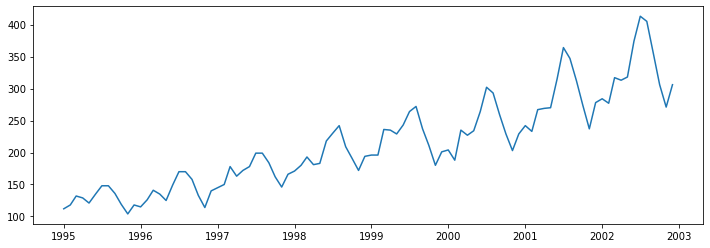

In [98]:
#Line plot of the airline data
plt.figure(figsize=(12,4))
plt.plot('Month','Passengers',data= airline)

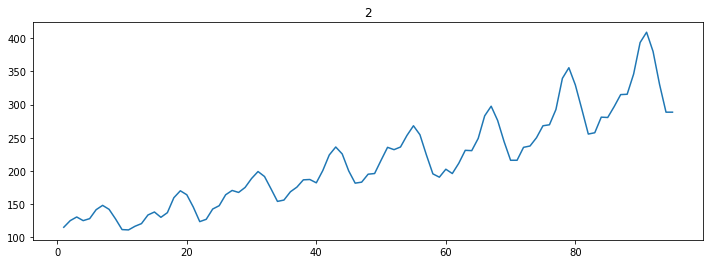

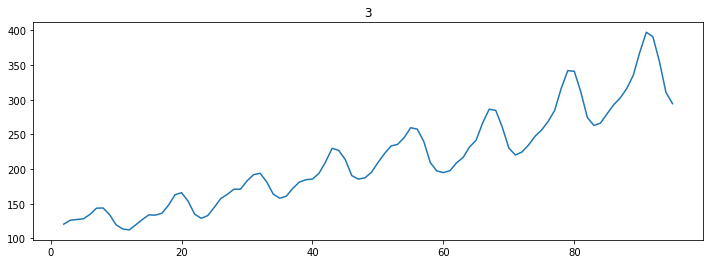

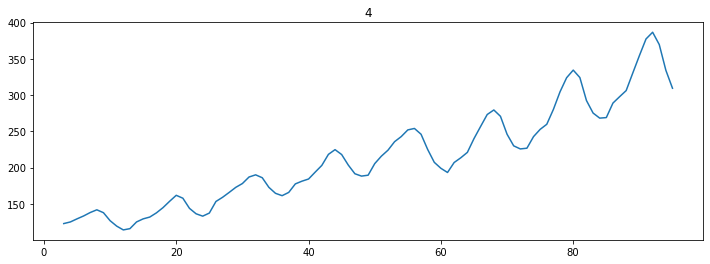

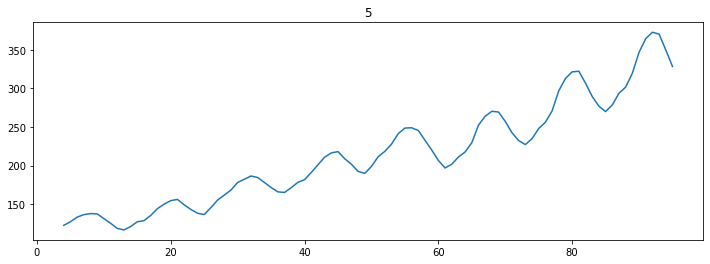

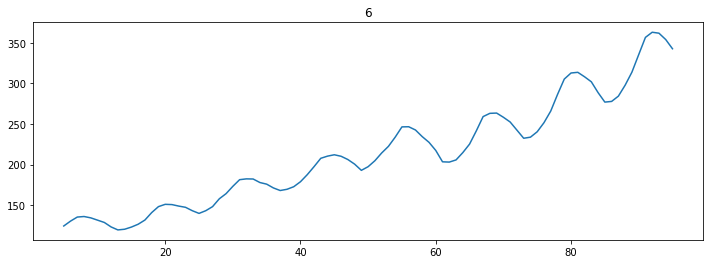

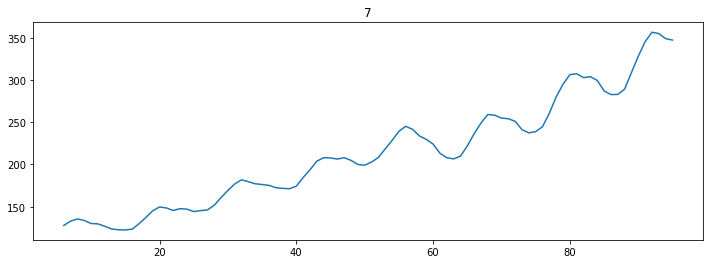

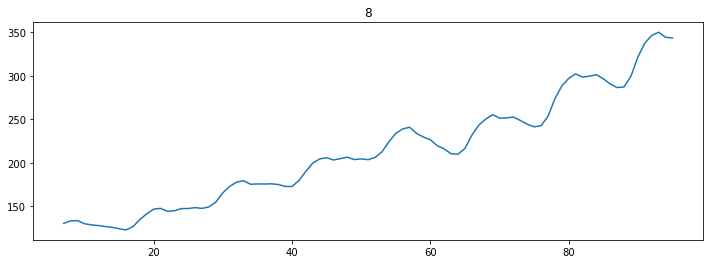

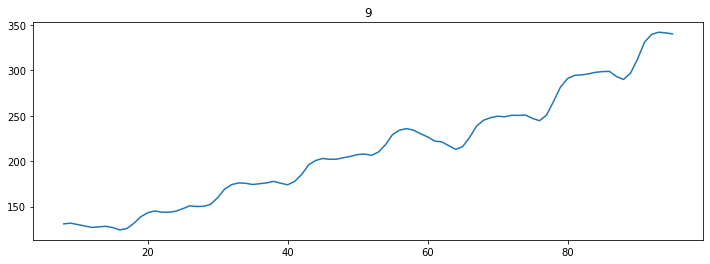

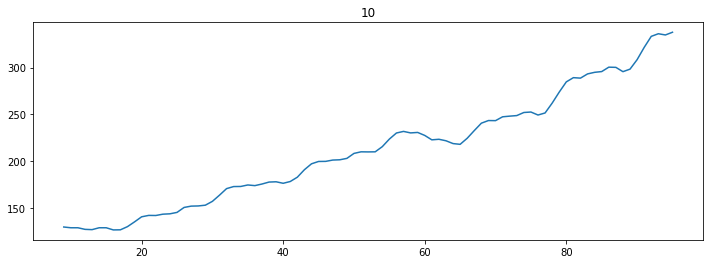

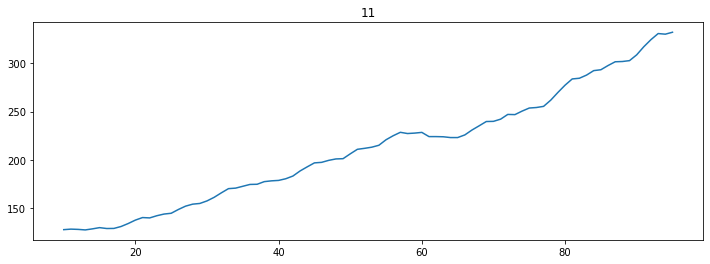

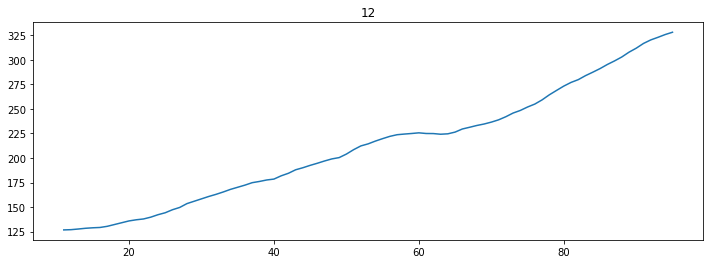

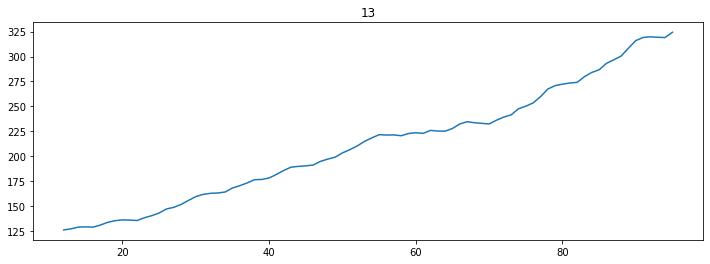

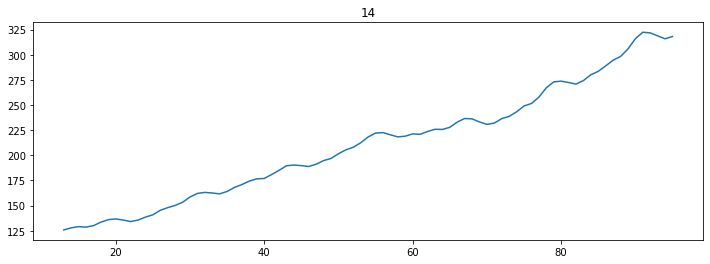

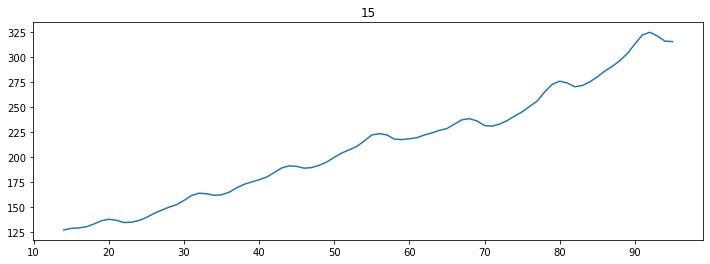

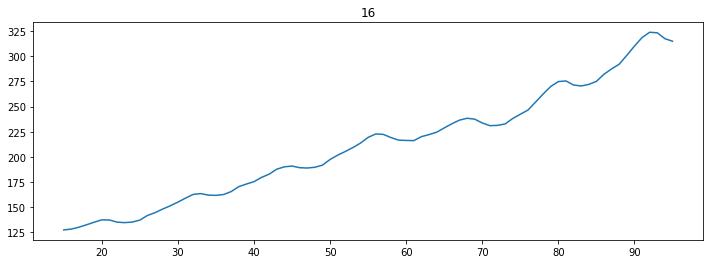

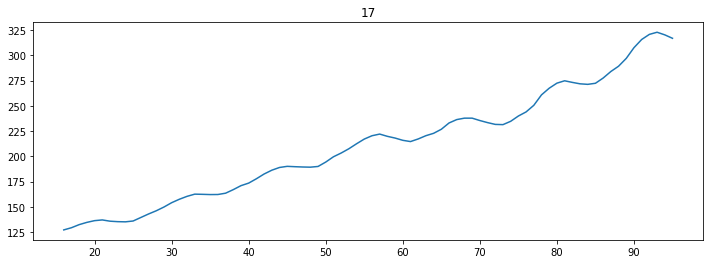

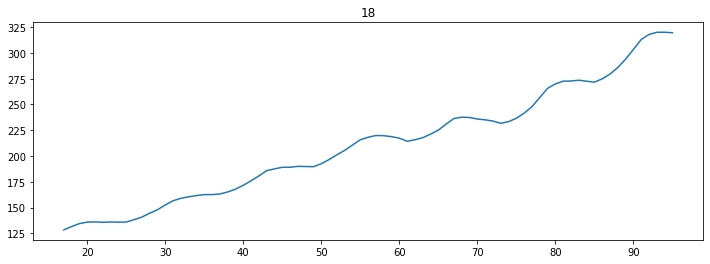

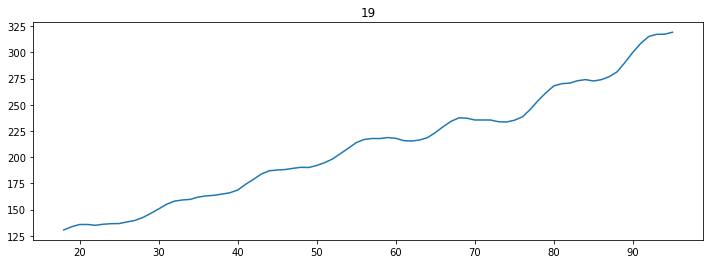

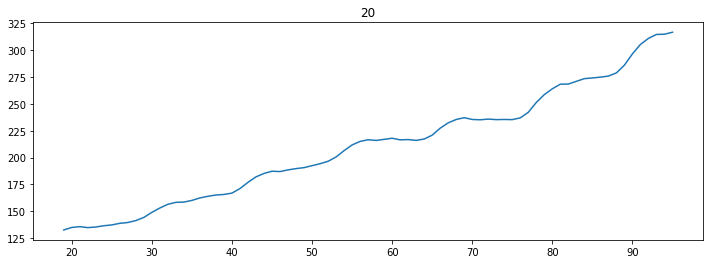

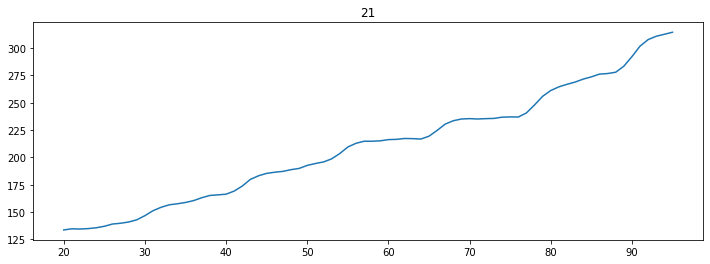

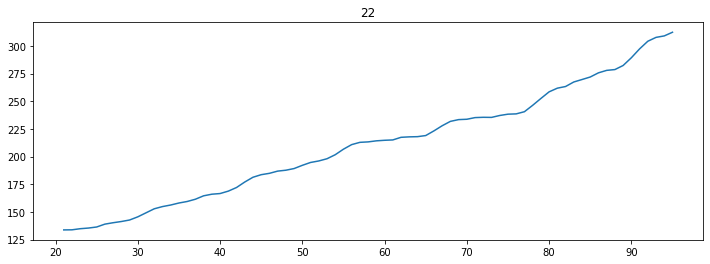

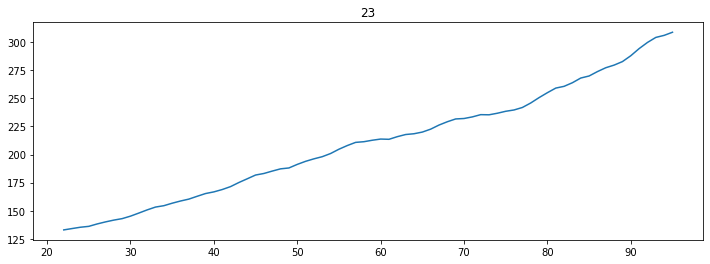

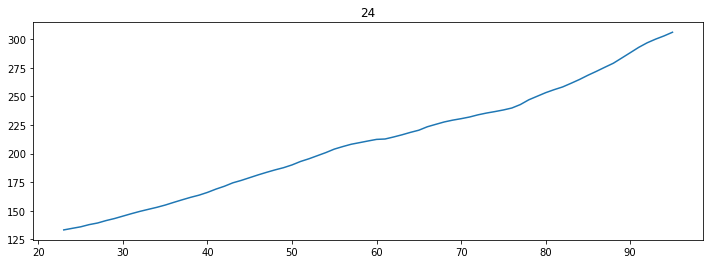

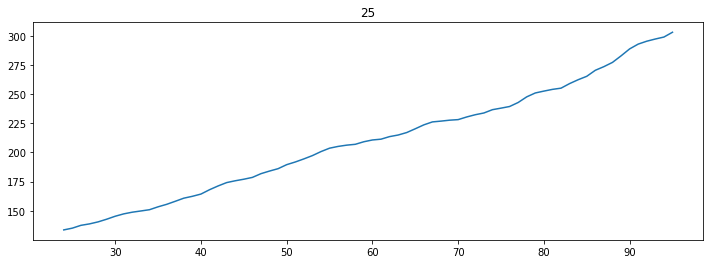

In [99]:
#Checking different window sizes for the airline data so as to find the best window size for moving average
for i in range(2,26):
    plt.figure(figsize=(12,4))
    airline.Passengers.rolling(i).mean().plot()
    plt.title(i)
    plt.show()

In [100]:
#from the above graphs it was clear that period of 12 is the most suited window size where graph is getting more smooth so window size =12
#Also this can be also verified as this smoothening is occuring at window size of 24 also and its getting bad after 12 and 24 

In [101]:
#Time series decomposition plot with season and trend and noise

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

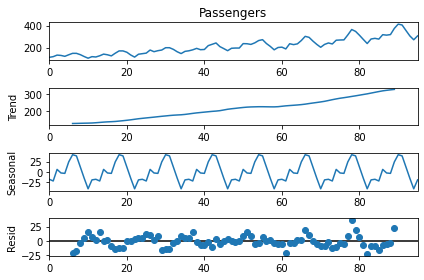

In [103]:
seasonal_decompose(airline.Passengers,period=12).plot()
plt.show()

In [104]:
#correlation plots
import statsmodels.graphics.tsaplots as tsa_plots

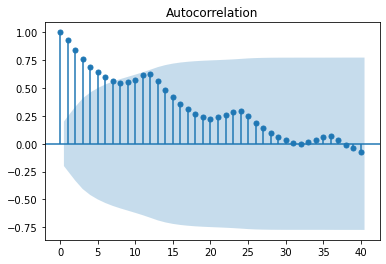

In [105]:
tsa_plots.plot_acf(airline.Passengers,lags=40)
plt.show()

In [106]:
#Here we are getting correlation as first positive and then becoming negative.

In [107]:
#Splitting the data

In [108]:
airtrain= airline.head(76)
airtest= airline.tail(20)

In [109]:
#defining rsme
def rsme(pred,org):
    sales = (((pred-org)**2).mean())**0.5
    return sales

In [110]:
import numpy as np
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [111]:
#model 1: simple exponetial model

In [112]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=0.9)
pred_ses_air= ses_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [113]:
rsme(pred_ses_air,airtest.Passengers)

66.540916130805

In [114]:
MAPE(pred_ses_air,airtest.Passengers)

14.866213671680418

In [115]:
#Calculating the best value of smoothing level which gives minimum MAPE error

In [116]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.95,0.96,0.99,1]
for i in x:
    ses_model1_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=i)
    pred_ses1_air= ses_model1_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
    score_air= MAPE(pred_ses1_air,airtest.Passengers)
    print("for smoothing level",i,"MAPE is",score_air)

for smoothing level 0.2 MAPE is 20.426622059557907
for smoothing level 0.3 MAPE is 19.337688834555532
for smoothing level 0.4 MAPE is 18.31609625788075
for smoothing level 0.41 MAPE is 18.213189756511575
for smoothing level 0.42 MAPE is 18.110467955866238
for smoothing level 0.43 MAPE is 18.008049448342557
for smoothing level 0.44 MAPE is 17.906056090565382
for smoothing level 0.5 MAPE is 17.309782053680447
for smoothing level 0.55 MAPE is 16.845270985831572
for smoothing level 0.6 MAPE is 16.421024232104056
for smoothing level 0.7 MAPE is 15.71288191459991
for smoothing level 0.78 MAPE is 15.285225087838393
for smoothing level 0.8 MAPE is 15.197137428714248
for smoothing level 0.9 MAPE is 14.866213671680418
for smoothing level 0.95 MAPE is 14.768663168226265
for smoothing level 0.96 MAPE is 14.754640941455083
for smoothing level 0.99 MAPE is 14.72372497392259
for smoothing level 1 MAPE is 14.717178689707755


In [117]:
#So this is giving minimum MAPE error at smoothing level= 1 suggesting that we can completely ignore the latest data and rely on old

In [118]:
#Calculating the best value of smoothing level which gives minimum rsme error

In [119]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.92,0.95,1]
for i in x:
    ses_model2_air = SimpleExpSmoothing(airtrain.Passengers).fit(smoothing_level=i)
    pred_ses2_air= ses_model2_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
    score2_air= rsme(pred_ses2_air,airtest.Passengers)
    print("for smoothing level",i,"rsme is",score2_air)

for smoothing level 0.2 rsme is 82.11594314672372
for smoothing level 0.3 rsme is 78.91408255350468
for smoothing level 0.4 rsme is 75.9687439978107
for smoothing level 0.41 rsme is 75.6754624071731
for smoothing level 0.42 rsme is 75.38335802382537
for smoothing level 0.43 rsme is 75.09277100232848
for smoothing level 0.44 rsme is 74.80404767725767
for smoothing level 0.5 rsme is 73.12964728837855
for smoothing level 0.55 rsme is 71.84199622653486
for smoothing level 0.6 rsme is 70.67952059930927
for smoothing level 0.7 rsme is 68.76981634505216
for smoothing level 0.78 rsme is 67.63625427476728
for smoothing level 0.8 rsme is 67.40470108496214
for smoothing level 0.9 rsme is 66.540916130805
for smoothing level 0.92 rsme is 66.42556696354112
for smoothing level 0.95 rsme is 66.28816482432045
for smoothing level 1 rsme is 66.15512073906298


In [120]:
#So this is giving minimum rsme error at smoothing level= 1 suggesting that we can completely ignore the latest data and rely on old

In [121]:
#2. Holt double exponential smoothing method

In [122]:
from statsmodels.tsa.holtwinters import Holt
des_model_air = Holt(airtrain.Passengers).fit(smoothing_level=0.9,smoothing_trend=0.2)
pred_des_air= des_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [123]:
rsme(pred_des_air,airtest.Passengers)

48.2901020803676

In [124]:
MAPE(pred_des_air,airtest.Passengers)

13.16613337417554

In [125]:
#Calculating the value of smoothing trend which gives minimum MAPE error

In [126]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.91,0.95,1]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model1_air = Holt(airtrain.Passengers).fit(smoothing_level=i,smoothing_trend=j)
        pred_des1_air= des_model1_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
        dscore_air= MAPE(pred_des1_air,airtest.Passengers)
        print("for smoothing levl",i,"smoothing trend",j,"MAPE is",dscore_air)

for smoothing levl 0.2 smoothing trend 0.05 MAPE is 14.015164095258001
for smoothing levl 0.2 smoothing trend 0.07 MAPE is 14.373211105190336
for smoothing levl 0.2 smoothing trend 0.1 MAPE is 14.7759976304992
for smoothing levl 0.2 smoothing trend 0.12 MAPE is 14.902718989701393
for smoothing levl 0.2 smoothing trend 0.13 MAPE is 14.93103381308074
for smoothing levl 0.2 smoothing trend 0.15 MAPE is 14.942541319730614
for smoothing levl 0.2 smoothing trend 0.16 MAPE is 14.93526904804914
for smoothing levl 0.2 smoothing trend 0.17 MAPE is 14.924745471056147
for smoothing levl 0.2 smoothing trend 0.18 MAPE is 14.91430241831928
for smoothing levl 0.2 smoothing trend 0.19 MAPE is 14.906770476253394
for smoothing levl 0.2 smoothing trend 0.2 MAPE is 14.904595852190962
for smoothing levl 0.2 smoothing trend 0.21 MAPE is 14.909953567336895
for smoothing levl 0.3 smoothing trend 0.05 MAPE is 13.740007590117353
for smoothing levl 0.3 smoothing trend 0.07 MAPE is 13.96853682128911
for smoothing 

for smoothing levl 0.7 smoothing trend 0.05 MAPE is 11.24639818824994
for smoothing levl 0.7 smoothing trend 0.07 MAPE is 11.270259353517488
for smoothing levl 0.7 smoothing trend 0.1 MAPE is 11.314177953566166
for smoothing levl 0.7 smoothing trend 0.12 MAPE is 11.348264907882143
for smoothing levl 0.7 smoothing trend 0.13 MAPE is 11.366587523236877
for smoothing levl 0.7 smoothing trend 0.15 MAPE is 11.405614856136468
for smoothing levl 0.7 smoothing trend 0.16 MAPE is 11.49431069009493
for smoothing levl 0.7 smoothing trend 0.17 MAPE is 11.692251533941773
for smoothing levl 0.7 smoothing trend 0.18 MAPE is 11.898179852583024
for smoothing levl 0.7 smoothing trend 0.19 MAPE is 12.133862559885976
for smoothing levl 0.7 smoothing trend 0.2 MAPE is 12.437962760344998
for smoothing levl 0.7 smoothing trend 0.21 MAPE is 12.752584209259906
for smoothing levl 0.78 smoothing trend 0.05 MAPE is 11.208486466435412
for smoothing levl 0.78 smoothing trend 0.07 MAPE is 11.238988451077287
for smoo

In [127]:
#so smoothing level 0.9 and smoothing trend nearby 0.05 gives the minimum MAPE error

In [128]:
#Calculating the value of smoothing trend which gives minimum rsme error

In [129]:
x= [0.2,0.3,0.4,0.41,0.42,0.43,0.44,0.5,0.55,0.6,0.7,0.78,0.8,0.9,0.91,0.95,1]
y= [0.05,0.07,0.1,0.12,0.13,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
for i in x:
    for j in y:
        des_model2_air = Holt(airtrain.Passengers).fit(smoothing_level=i,smoothing_trend=j)
        pred_des2_air= des_model2_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])
        dscore2_air= rsme(pred_des2_air,airtest.Passengers)
        print("for smoothing levl",i,"smoothing trend",j,"rsme is",dscore2_air)

for smoothing levl 0.2 smoothing trend 0.05 rsme is 62.10199963902304
for smoothing levl 0.2 smoothing trend 0.07 rsme is 63.236619729254166
for smoothing levl 0.2 smoothing trend 0.1 rsme is 64.52868661339527
for smoothing levl 0.2 smoothing trend 0.12 rsme is 64.93160309131174
for smoothing levl 0.2 smoothing trend 0.13 rsme is 65.01827750091229
for smoothing levl 0.2 smoothing trend 0.15 rsme is 65.04477583253396
for smoothing levl 0.2 smoothing trend 0.16 rsme is 65.01649431093992
for smoothing levl 0.2 smoothing trend 0.17 rsme is 64.97869204690817
for smoothing levl 0.2 smoothing trend 0.18 rsme is 64.94247200531613
for smoothing levl 0.2 smoothing trend 0.19 rsme is 64.91723985482734
for smoothing levl 0.2 smoothing trend 0.2 rsme is 64.91111618653717
for smoothing levl 0.2 smoothing trend 0.21 rsme is 64.93134081278657
for smoothing levl 0.3 smoothing trend 0.05 rsme is 61.263946253366655
for smoothing levl 0.3 smoothing trend 0.07 rsme is 61.96478447240675
for smoothing levl 0

for smoothing levl 0.7 smoothing trend 0.13 rsme is 47.18834893488672
for smoothing levl 0.7 smoothing trend 0.15 rsme is 46.54213651493511
for smoothing levl 0.7 smoothing trend 0.16 rsme is 46.37547912701104
for smoothing levl 0.7 smoothing trend 0.17 rsme is 46.33655586624354
for smoothing levl 0.7 smoothing trend 0.18 rsme is 46.44249161452077
for smoothing levl 0.7 smoothing trend 0.19 rsme is 46.70947890408546
for smoothing levl 0.7 smoothing trend 0.2 rsme is 47.15215945113252
for smoothing levl 0.7 smoothing trend 0.21 rsme is 47.782956970756146
for smoothing levl 0.78 smoothing trend 0.05 rsme is 50.40612624635861
for smoothing levl 0.78 smoothing trend 0.07 rsme is 49.312900676245214
for smoothing levl 0.78 smoothing trend 0.1 rsme is 47.67551899921115
for smoothing levl 0.78 smoothing trend 0.12 rsme is 46.79117272326746
for smoothing levl 0.78 smoothing trend 0.13 rsme is 46.4659150890136
for smoothing levl 0.78 smoothing trend 0.15 rsme is 46.13546756450003
for smoothing l

In [130]:
#so smoothing level 0.95 and smoothing trend nearby 0.15 gives the minimum MAPE error.Also compared with the single exponential model this model gives less error(both rsme and MAPE)

In [131]:
#3.1 Holts winter exponential smoothing with additive seasonality and additive trend

In [132]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes_model_air= ExponentialSmoothing(endog=airtrain.Passengers,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=0.9,smoothing_trend=0.15)
pred_tes_air=tes_model_air.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [133]:
MAPE(pred_tes_air,airtest.Passengers)

5.639335762517935

In [134]:
rsme(pred_tes_air,airtest.Passengers)

26.698802672682703

In [135]:
#3.2 Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [136]:
tes_model_air1= ExponentialSmoothing(endog=airtrain.Passengers,trend='add',seasonal='mul',seasonal_periods=12).fit(smoothing_level=0.9,smoothing_trend=0.15)
pred_tes_air1=tes_model_air1.predict(start=airtest.Month.index[0],end=airtest.Month.index[19])

In [137]:
MAPE(pred_tes_air1,airtest.Passengers)

5.285019509534238

In [138]:
rsme(pred_tes_air1,airtest.Passengers)

20.619582283468443

In [139]:
#So Holts winter exponential smoothing with multiplicative seasonality and additive trend gives minimum error values for both(rsme and MAPE)

In [140]:
# So we can say that this is best model compared with simple and double exponential model

In [141]:
#So forecasting the data with this
tes_model_air1.forecast(10)

76    267.528668
77    297.676892
78    329.721537
79    332.375920
80    295.742689
81    261.988129
82    230.548984
83    261.933568
84    268.825213
85    267.318977
dtype: float64

In [142]:
#Check with the arima model 

In [143]:
from statsmodels.tsa.arima_model import ARIMA

In [144]:
model1= ARIMA(airtrain.Passengers.astype('float32'),order=(3,2,1))

In [145]:
model_fit1= model1.fit()

In [146]:
yhat1= model_fit1.forecast()[0]

In [147]:
rsme(yhat1,airtest.Passengers.astype('float32'))

66.98025189284493

In [148]:
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values 
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
 adf_test(airtrain['Passengers'])

1. ADF :  0.13365785512442402
2. P-Value :  0.9682853501421519
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 63
5. Critical Values :
	 1% :  -3.5386953618719676
	 5% :  -2.9086446751210775
	 10% :  -2.591896782564878


In [149]:
#As p value is high we can say that data is not stationary

In [150]:
#Now, let’s take the log difference in an effort to make it stationary
airline['Passengers'] = np.log(airline['Passengers'])
airline['Passengers'] = airline['Passengers'].diff()
airline = airline.drop(coctrain.index[0])

In [151]:
airline

,Month,Passengers
1,1995-02-01,0.052186
2,1995-03-01,0.112117
3,1995-04-01,-0.022990
4,1995-05-01,-0.064022
5,1995-06-01,0.109484
...,...,...
91,2002-08-01,-0.019561
92,2002-09-01,-0.131769
93,2002-10-01,-0.148533
94,2002-11-01,-0.121466


<AxesSubplot:>

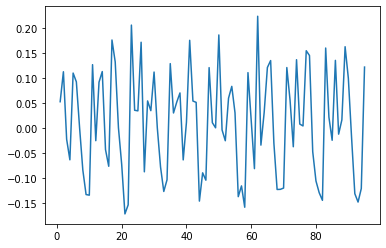

In [153]:
airline.Passengers.plot()

In [154]:
#still our data contains the seasonality so taking period of 1 as we have monthly data

In [155]:
# Seasonal differencing
airline['Passengers'] = airline['Passengers'].diff(1)

In [158]:
airline = airline.drop(coctrain.index[1])

In [159]:
airline

,Month,Passengers
2,1995-03-01,0.059932
3,1995-04-01,-0.135107
4,1995-05-01,-0.041032
5,1995-06-01,0.173506
6,1995-07-01,-0.017547
...,...,...
91,2002-08-01,-0.118752
92,2002-09-01,-0.112209
93,2002-10-01,-0.016763
94,2002-11-01,0.027066


In [161]:
airline.shape

(94, 2)

In [162]:
#again splitting the data
airtrain1= airline.head(75)
airtest1= airline.tail(19)

In [163]:
#Again checking for the fuller test of stationary data
 #applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller
 #creating a function for values 
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
 #printing for AvgTemp
adf_test(airtrain1['Passengers'])

1. ADF :  -9.336463399016507
2. P-Value :  9.035071885783925e-16
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 63
5. Critical Values :
	 1% :  -3.5386953618719676
	 5% :  -2.9086446751210775
	 10% :  -2.591896782564878


In [164]:
#hence now we have got p value very less so we can consider this data as stationary

In [165]:
#finding best values of p,d and q

In [167]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [168]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [169]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [170]:
result_df1 = optimize_SARIMA(parameters_list, 1, 1, 4, airtrain1['Passengers'])
result_df1

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 3, 2, 3)",-177.953518
1,"(0, 3, 3, 3)",-177.029049
2,"(1, 2, 2, 3)",-176.411151
3,"(0, 2, 3, 3)",-176.168853
4,"(0, 2, 2, 3)",-174.530914
...,...,...
251,"(3, 0, 0, 0)",5.769007
252,"(1, 0, 1, 0)",12.393907
253,"(1, 0, 0, 0)",28.188494
254,"(0, 0, 1, 0)",39.204965


In [171]:
result_df1.AIC.min()

-177.9535176303704

In [172]:
# From the table, we can see that the best model is: SARIMA(0, 1, 3)(2, 1, 3, 4)

In [173]:
#So this is the SARIMA model for the data

In [176]:
best_model1 = SARIMAX(airtrain1['Passengers'], order=(0, 1, 3), seasonal_order=(2, 1, 3, 4)).fit(dis=-1)
print(best_model1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Passengers   No. Observations:                   75
Model:             SARIMAX(0, 1, 3)x(2, 1, 3, 4)   Log Likelihood                  97.977
Date:                           Mon, 04 Apr 2022   AIC                           -177.954
Time:                                   21:14:58   BIC                           -157.717
Sample:                                        0   HQIC                          -169.915
                                            - 75                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.2822      4.758     -0.480      0.631     -11.608       7.044
ma.L2          1.5872      6.147      0.258

In [177]:
# Now predicting the data

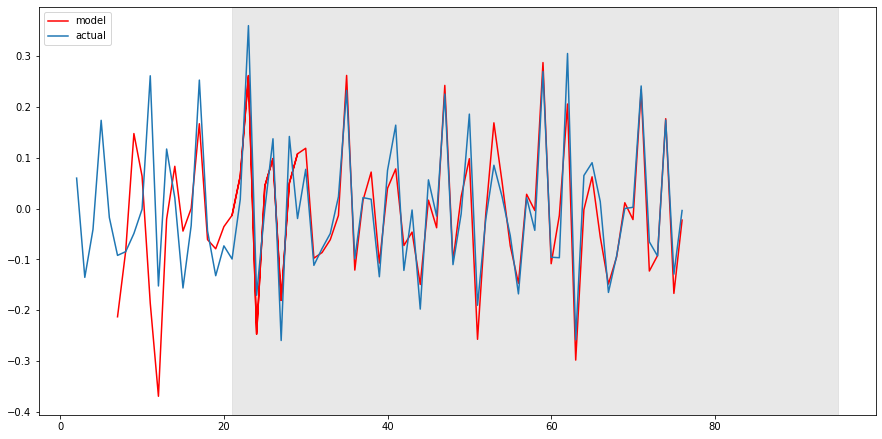

In [178]:
airline['arima_model1'] = best_model1.fittedvalues
airline['arima_model1'][:4+1] = np.NaN
forecast1 = best_model1.predict(start=airtest1.Passengers.shape[0], end=airtest1.Passengers.shape[0] + 8)
forecast1 = airline['arima_model1'].append(forecast1)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast1, color='r', label='model')
plt.axvspan(airtest1.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(airtrain1['Passengers'], label='actual')
plt.legend()
plt.show()

In [179]:
#Hence this is model with minimum error if SARIMA is considered